## Visión por Computadora 1 - Cohorte 17
## Trabajo Práctico 1
## Paola Cartala - Florentino Arias

## Parte 1, punto 1: Implementar el algoritmo de coordenadas cromáticas para las imágenes 'CoordCrom_1.png', 'CoordCrom_2.png', y 'CoordCrom_3.png'.
Coordenadas cromáticas transforma los valores de RGB de una imagen para reducir el impacto del contraste.

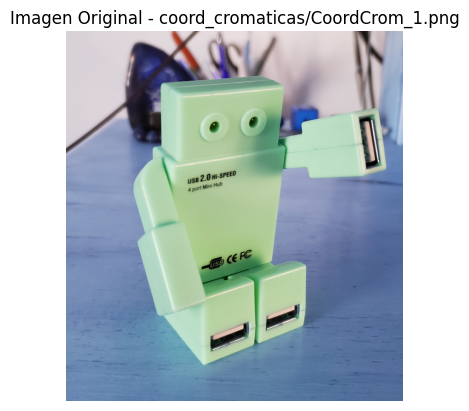

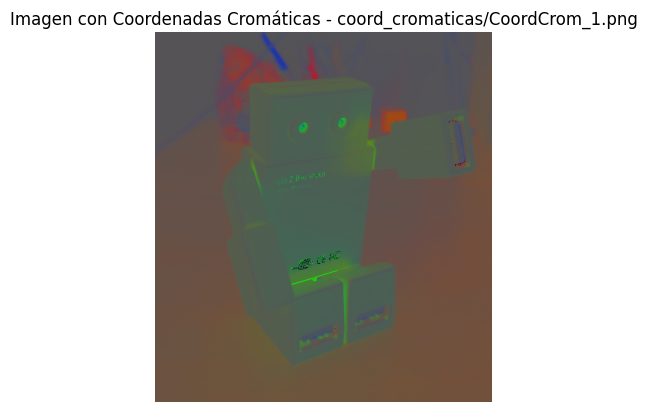

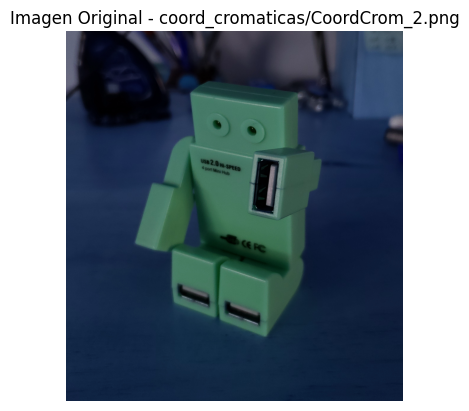

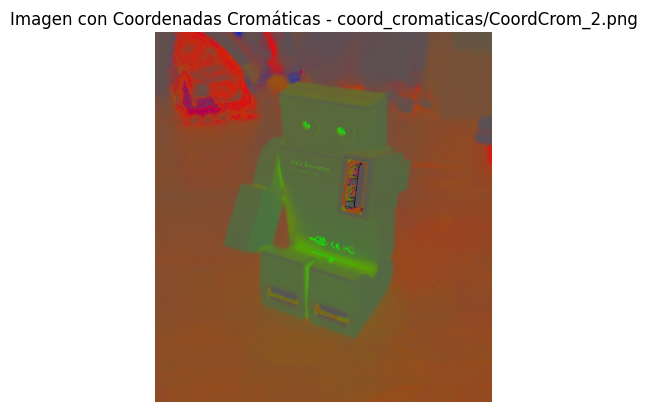

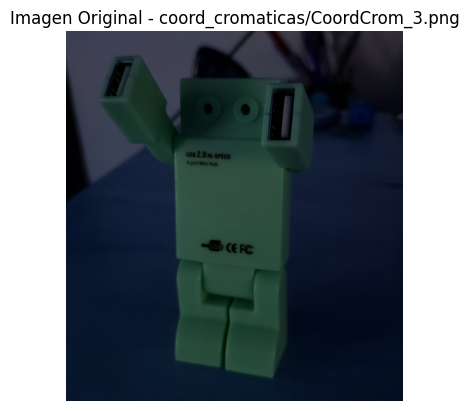

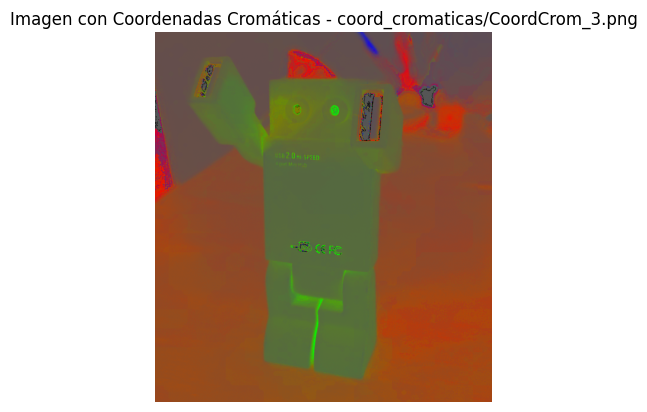

In [5]:
import cv2 as cv
import numpy as np
import matplotlib.pyplot as plt

imagenes_coord_crom = ['coord_cromaticas/CoordCrom_1.png', 'coord_cromaticas/CoordCrom_2.png', 'coord_cromaticas/CoordCrom_3.png']

# Leer y mostrar las imágenes originales
for imagen in imagenes_coord_crom:
    imagen_actual = cv.imread(imagen)
    # Mostrar la imagen original
    plt.imshow(imagen_actual)
    plt.title(f'Imagen Original - {imagen}')
    plt.axis('off')
    plt.show()

    imagen_actual = cv.cvtColor(imagen_actual, cv.COLOR_BGR2RGB)
        
    # Pasar a Coordenadas Cromáticas
    sum_channels = np.sum(imagen_actual, axis=2, keepdims=True)
    sum_channels = np.where(sum_channels == 0, 1, sum_channels)  # Para evitar divisiones por cero
    coord_cromaticas = imagen_actual / sum_channels

    # Mostrar la imagen transformada
    plt.imshow(coord_cromaticas)
    plt.title(f'Imagen con Coordenadas Cromáticas - {imagen}')
    plt.axis('off')
    plt.show()


## Parte 1, punto 2: Implementar el algoritmo White Patch para ajustar la iluminación de las imágenes proporcionadas.
White Patch ajusta los valores de RGB en función del valor más alto en cada canal, normalizando para simular una mejor iluminación.

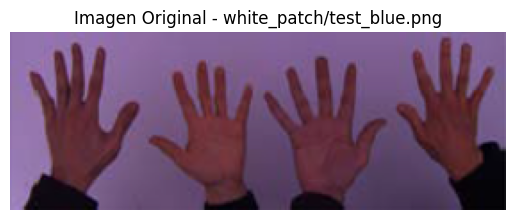

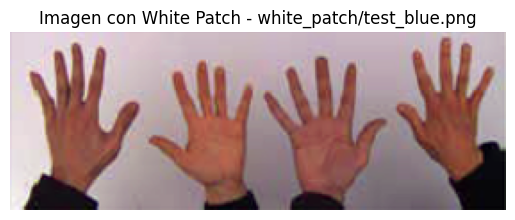

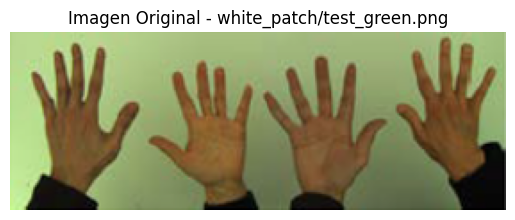

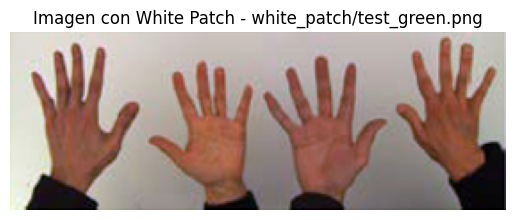

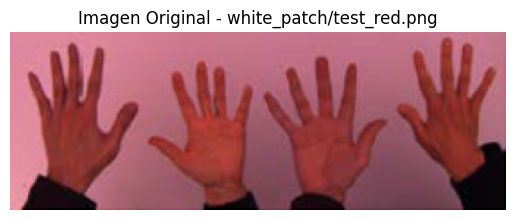

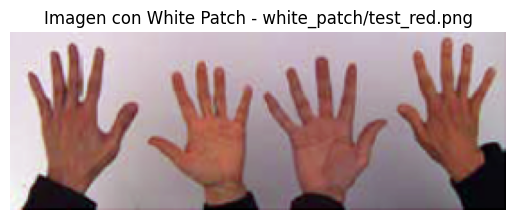

error: OpenCV(4.10.0) D:\a\opencv-python\opencv-python\opencv\modules\imgproc\src\color.cpp:196: error: (-215:Assertion failed) !_src.empty() in function 'cv::cvtColor'


In [7]:
imagenes_wp = [
    'white_patch/test_blue.png', 'white_patch/test_green.png', 'white_patch/test_red.png',
    'white_patch/wp_blue.png', 'white_patch/wp_green.png', 'white_patch/wp_green2.png', 
    'white_patch/wp_red.png', 'white_patch/wp_red2.png'
]

for imagen in imagenes_wp:
    imagen_actual = cv.imread(imagen)
    imagen_actual = cv.cvtColor(imagen_actual, cv.COLOR_BGR2RGB)
    # Mostrar la imagen original
    plt.imshow(imagen_actual)
    plt.title(f'Imagen Original - {imagen}')
    plt.axis('off')
    plt.show()
    
    # Aplicar White Patch para cada canal
    max_values = np.max(imagen_actual, axis=(0, 1))  # Valores máximos de R, G, B
    white_patch_aplicado = (imagen_actual / max_values) * 255
    white_patch_aplicado = np.clip(white_patch_aplicado, 0, 255).astype(np.uint8)
    
    # Mostrar la imagen transformada
    plt.imshow(white_patch_aplicado)
    plt.title(f'Imagen con White Patch - {imagen}')
    plt.axis('off')
    plt.show()


## Parte 1, punto 3: Mostrar los resultados obtenidos y analizar las posibles fallas del algoritmo White Patch.
Una posible falla de White Patch es que el algoritmo asume que el color más brillante corresponde al blanco, lo cual puede no ser cierto en algunas casos. Este supuesto podría llevar a problemas cuando no hay ningún "parche blanco" en la imagen, resultando en una corrección de color imprecisa.

## Parte 2, punto 1: Leer las imágenes 'img1_tp.png' y 'img2_tp.png' en escala de grises y visualizarlas.

In [ ]:
image_paths_grayscale = ['img1_tp.png', 'img2_tp.png']

for path in image_paths_grayscale:
    image_gray = cv2.imread(path, cv2.IMREAD_GRAYSCALE)
    
    # Mostrar la imagen en escala de grises
    plt.imshow(image_gray, cmap='gray')
    plt.title(f'Imagen en escala de grises - {path}')
    plt.axis('off')
    plt.show()


## Parte 2, punto 2: Elegir el número de bins y graficar histogramas.

In [ ]:
bins = 256  # Puedes elegir el número de bins según el nivel de detalle requerido

for path in image_paths_grayscale:
    image_gray = cv2.imread(path, cv2.IMREAD_GRAYSCALE)
    hist = cv2.calcHist([image_gray], [0], None, [bins], [0, 256])
    
    # Graficar el histograma
    plt.plot(hist, color='black')
    plt.title(f'Histograma de escala de grises - {path}')
    plt.xlabel('Intensidad')
    plt.ylabel('Frecuencia')
    plt.show()


En cuanto a si los histogramas serían útiles como características para un modelo de clasificación, sí, pueden ser útiles. Proveen información sobre la distribución de intensidad en la imagen, lo que podría ser relevante para identificar patrones globales. Sin embargo, para detección de características espaciales específicas, los histogramas pueden no ser suficientes por sí solos.

## Parte 2, punto 3: Análisis del histograma RGB y segmentación de elementos de la imagen 'segmentacion.png'.

In [ ]:
# Leer la imagen y analizar los canales RGB
segment_image = cv2.imread('segmentacion.png')
segment_image = cv2.cvtColor(segment_image, cv2.COLOR_BGR2RGB)

# Graficar histogramas para los canales RGB
colors = ('r', 'g', 'b')
for i, color in enumerate(colors):
    hist = cv2.calcHist([segment_image], [i], None, [256], [0, 256])
    plt.plot(hist, color=color)
    plt.title('Histograma de Canales RGB')
plt.xlabel('Intensidad')
plt.ylabel('Frecuencia')
plt.show()

# Segmentación usando máscaras
lower_sky = np.array([135, 180, 200])
upper_sky = np.array([200, 255, 255])
mask_sky = cv2.inRange(segment_image, lower_sky, upper_sky)
segmented_sky = cv2.bitwise_and(segment_image, segment_image, mask=mask_sky)

plt.imshow(segmented_sky)
plt.title('Cielo Segmentado')
plt.axis('off')
plt.show()
